In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm import tqdm

In [2]:
def random_color():
    return tuple(np.random.randint(0, 256, size=3).tolist())

def random_shape(image_size, shapes):
    shape = random.choice(shapes)
    if shape == 'circle':
        scaling = 3
        radius = random.randint(2, min(image_size)//scaling)
        center = (random.randint(radius, image_size[0]-radius), random.randint(radius, image_size[1]-radius))
        return shape, center, radius
    elif shape == 'ellipse':
        scaling = 3
        radius_1 = random.randint(2, min(image_size)//scaling)
        radius_2 = random.randint(2, min(image_size)//scaling)
        center = (random.randint(radius_1, image_size[0]-radius_1), random.randint(radius_2, image_size[1]-radius_2))
        return shape, center, radius_1, radius_2
    elif shape == 'rectangle':
        scaling = 3
        top_left = (random.randint(2, image_size[0]//scaling), random.randint(2, image_size[1]//scaling))
        bottom_right = (random.randint(image_size[0]//scaling, image_size[0]), random.randint(image_size[1]//scaling, image_size[1]))
        return shape, top_left, bottom_right
    elif shape == 'square' or shape == 'pentagon' or shape == 'hexagon':
        scaling = 3
        radius = random.randint(2, min(image_size)//scaling)
        center = (random.randint(radius, image_size[0]-radius), random.randint(radius, image_size[1]-radius))
        rotation = random.randint(0, 360)
        return shape, center, radius, rotation
    elif shape == 'triangle':
        scaling_upper = 2
        scaling_lower = 8
        radius = random.randint(min(image_size)//scaling_lower, min(image_size)//scaling_upper)
        center = (random.randint(radius, image_size[0]-radius), random.randint(radius, image_size[1]-radius))
        rotation = random.randint(0, 360)
        return shape, center, radius, rotation

def draw_shape(draw, shape_info, color):
    shape, *args = shape_info
    if shape == 'circle':
        center, radius = args
        draw.ellipse((center[0]-radius, center[1]-radius, center[0]+radius, center[1]+radius), fill=color)
    elif shape == 'ellipse':
        center, radius_1, radius_2 = args
        draw.ellipse((center[0]-radius_1, center[1]-radius_2, center[0]+radius_1, center[1]+radius_2), fill=color)
    elif shape == 'rectangle':
        top_left, bottom_right = args
        draw.rectangle([top_left, bottom_right], fill=color)
    elif shape == 'square':
        center, radius, rotation = args
        draw.regular_polygon((center, radius), n_sides=4, rotation=rotation, fill=color)
    elif shape == 'pentagon':
        center, radius, rotation = args
        draw.regular_polygon((center, radius), n_sides=5, rotation=rotation, fill=color)
    elif shape == 'hexagon':
        center, radius, rotation = args
        draw.regular_polygon((center, radius), n_sides=6, rotation=rotation, fill=color)
    elif shape == 'triangle':
        center, radius, rotation = args
        draw.regular_polygon((center, radius), n_sides=3, rotation=rotation, fill=color)

def plot_image(image_np, mask_np):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image_np)
    ax[0].set_title('Image')
    ax[0].axis('off')

    ax[1].imshow(mask_np, cmap='gray')
    ax[1].set_title('Mask')
    ax[1].axis('off')

    plt.show()

def generate_dataset(num_images, image_size, shapes_list, output_dir, inner_dir):
    if not os.path.exists(os.path.join(output_dir, inner_dir, 'images')):
        os.makedirs(os.path.join(output_dir, inner_dir, 'images'))
    if not os.path.exists(os.path.join(output_dir, inner_dir, 'masks')):
        os.makedirs(os.path.join(output_dir, inner_dir, 'masks'))

    print('Creating ' + inner_dir + ' images...')
    
    # Lists to store numpy arrays
    image_np = np.zeros(image_size, dtype=np.uint8)
    mask_np = np.zeros(image_size, dtype=np.uint8)

    total_zeros_count = 0
    total_ones_count = 0

    # Generate images and masks
    for i in tqdm(range(num_images)):
        # Create a blank image and mask
        image = Image.new('RGB', image_size, (255, 255, 255))
        mask = Image.new('L', image_size, 0)

        draw_image = ImageDraw.Draw(image)
        draw_mask = ImageDraw.Draw(mask)

        shapes_to_draw = random.randint(4, 10)
        shapes_info_list = [random_shape(image_size, shapes_list) for _ in range(shapes_to_draw)]

        image_name = f'image_{i:06d}.png'
        mask_name = f'mask_{i:06d}.png'

        # shapes_info_list[-1] = random_shape(image_size, ['triangle'])
        if i % 2 == 0:
            shapes_info_list[-1] = random_shape(image_size, ['triangle'])
            # random.shuffle(shapes_info_list) # Uncomment to have the triangle not be on top

        for shape_info in shapes_info_list:
            # Random shape properties
            shape_color = random_color()
            shape_mask_color = 255  # white in the mask for the shape

            # Draw shape on image and mask
            draw_shape(draw_image, shape_info, shape_color)

            if shape_info[0] == 'triangle':
                draw_shape(draw_mask, shape_info, shape_mask_color)

        # Convert to numpy arrays
        image_np = np.array(image)
        mask_np = np.array(mask)

        total_ones_count += np.count_nonzero(mask_np)
        total_zeros_count += (image_size[0] * image_size[1]) - np.count_nonzero(mask_np)

        # Save the image and mask
        image.save(os.path.join(output_dir, inner_dir, 'images', image_name))
        mask.save(os.path.join(output_dir, inner_dir, 'masks', mask_name))

    # Plot the first image and mask as an example
    plot_image(image_np, mask_np)

    print('Done')
    
    print('Total zero pixels:', total_zeros_count)
    print('Total one pixels:', total_ones_count)

Creating train images...


100%|███████████████████████████████████████████████████████████████████████████████████████| 12800/12800 [02:15<00:00, 94.52it/s]


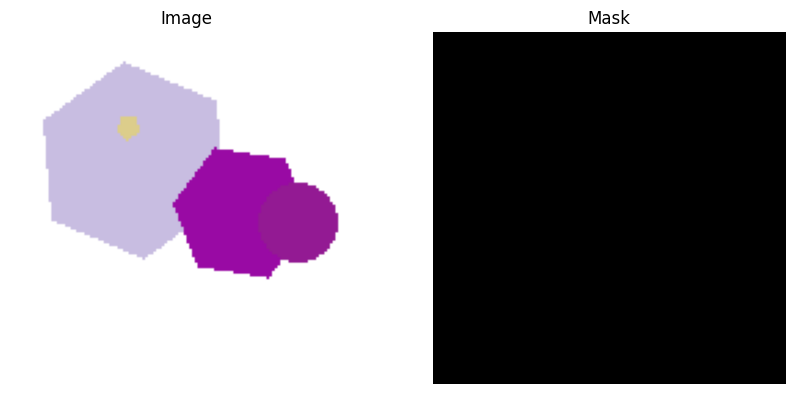

Done
Total zero pixels: 194207328
Total one pixels: 15507872
Creating val images...


100%|████████████████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:10<00:00, 100.15it/s]


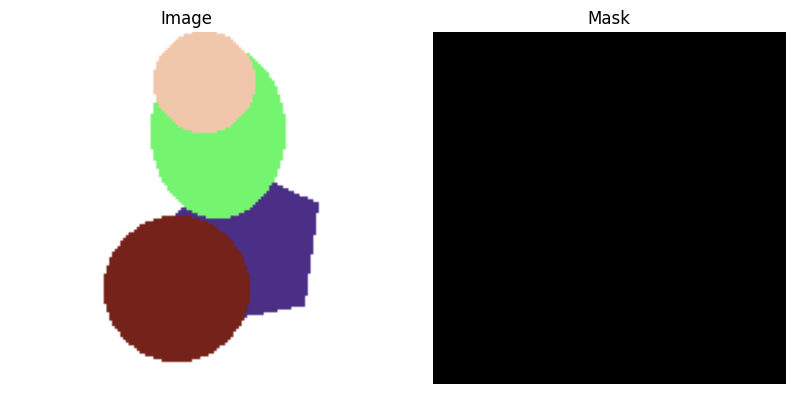

Done
Total zero pixels: 15511663
Total one pixels: 1265553
Creating test images...


100%|██████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 104.12it/s]


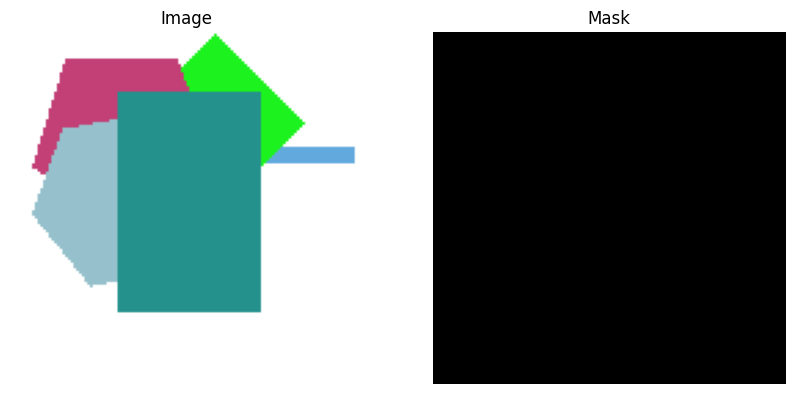

Done
Total zero pixels: 1958846
Total one pixels: 138306


In [3]:
# Parameters
image_size = (128, 128)
shapes_list = ['circle', 'ellipse', 'square', 'rectangle', 'pentagon', 'hexagon']
output_dir = 'shapes_dataset'
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

# Create directories
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

generate_dataset(12800, image_size, shapes_list, output_dir, train_dir)
generate_dataset(1024, image_size, shapes_list, output_dir, val_dir)
generate_dataset(128, image_size, shapes_list, output_dir, test_dir)